In [1]:
# K-means package
from sklearn.cluster import KMeans
# Denrogram package
from scipy.cluster.hierarchy import linkage, dendrogram

# Importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting up working directory
import os
os.chdir(os.getcwd())

In [2]:
# Reading initial data set as Pandas Data Frame
df = pd.read_excel('DataV20.xlsx', index_col = 0, header = 0)

# Converting it into Numpy array
samples = df.as_matrix()

FileNotFoundError: [Errno 2] No such file or directory: 'DataV20.xlsx'

### Testing K-means algorithm

In [122]:
# Loading KMeans model
# The number of clusters
n = 5 
model = KMeans(n_clusters = n)

# Clustering the data
model.fit(samples)

# Getting the labes of the clusters
labels = model.predict(samples)

### Checking for a number of clusters using inertia

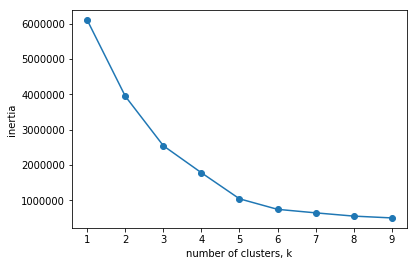

In [123]:
# Trying to find an optimal number of clusters using inertia
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Plotting results

In [124]:
district_clusters = pd.DataFrame({'labels': labels, 'districts': df.index})
# Sorted by label results
# print(district_clusters.sort_values(by = 'labels'))

                       districts  labels
0                     Oostduinen       0
42                      Forepark       0
24          Mariahoeve en Marlot       0
18                 Vruchtenbuurt       0
17                       Waldeck       0
15     Kraayenstein en Vroondaal       0
14        Kijkduin en Ockenburgh       0
13          Bohemen, Meer en Bos       0
12                     Vogelwijk       0
22                   Willemspark       0
34                    Zuiderpark       0
9                      Zorgvliet       0
38                    Binckhorst       0
7                       Duindorp       0
5    Van Stolkpark en Schev. Bos       0
40                    Hoornwijck       0
2        Westbroekpark/Duttendel       0
1                  Belgisch Park       0
36        Groente- en Fruitmarkt       0
23                    Haagse Bos       0
39               Wateringse Veld       1
26                 Stationsbuurt       1
41                      Ypenburg       1
25              

### Plotting results using 2 dimensions

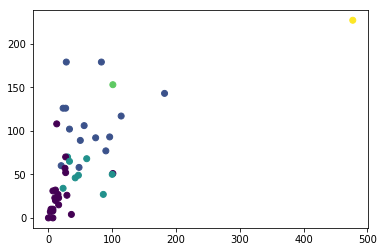

In [134]:
# 
xs = samples[:, 8]
ys = samples[:, 9]

# 
plt.scatter(xs, ys, c = labels)
plt.show()

### Testing Seaborn Clustermap

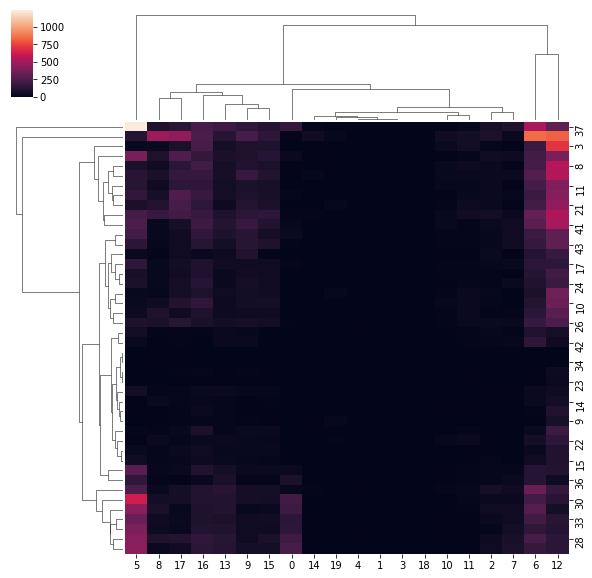

In [116]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Basic example
# df = pd.DataFrame({"col" + str(num): np.random.randn(50) for num in range(1,5)})

# Our case
sns.clustermap(samples)

### Hierarchical clustering, dendrogram

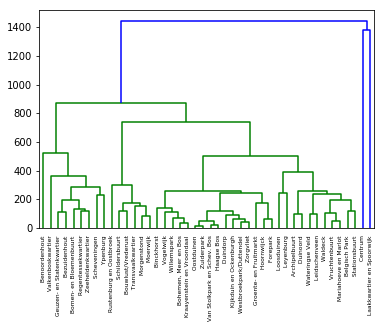

In [114]:
mergings = linkage(samples, method = 'complete')
dendrogram(mergings, labels = df.index, leaf_rotation = 90, leaf_font_size = 6)
plt.show()